project of the gang

In [67]:
import numpy as np
import pandas as pd
from time import time
import visuals as vs
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
data = pd.read_csv('datasal.csv')

In [69]:
print(data.head(3))

   age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   

           occupation    relationship    race    sex  capital-gain  \
0        Adm-clerical   Not-in-family   White   Male        2174.0   
1     Exec-managerial         Husband   White   Male           0.0   
2   Handlers-cleaners   Not-in-family   White   Male           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States  <=50K  
1           0.0            13.0   United-States  <=50K  
2           0.0            40.0   United-States  <=50K  


In [70]:
#age - הגיל של כל אדם, יש בקרה בקובץ שהגיליים יהיו מעל גיל 16 מכל מדינה
#workclass - מציין מה מעמד העבודה או קטוגרייה התעסוקה למשל - עצמאי,ממלא מקום,עובד ממשלתי
#education_level - מתייחס לרמת ההשכלה הגבוהה ביותר שהשיג (תואר ראשון, שני או דוקטורט
#education-num - מספר שנות ההשכלה שהושלמו
#marital-status - המצב המשפחתי (מעולם לא היה נשוי, נשוי -אזרחי עם בן זוג, גרוש וכו) 
#occupation - סוג העיסוק או התפקיד של האדם (פקיד, מנהל וכו)
#relationship - מצב היחסים ביחס למשק בית כמו למשל לא במשפחה או בעל
#race - גזע (לבן, שחור וכו)
#sex - מין (זכר, נקבה)
#capital-gain - רווחי ההון שמדווחים ומייצגים עלייה בנכסים
#capital-loss - מייצג את הפסדי ההון שמדווחים ומייצגים ירידה בערך הנכסים
#hours-per-week - מספר שעות עבודה בשבוע
#native-country - מדינת מוצא או אזרחות
#income - הכנסה, מעל 50 אלף או מתחת ל50 אלף

In [71]:
print("Number of records:", data.shape[0])

Number of records: 45222


a. Median age: 37.0
b. 75th percentile of education-num: 13.0


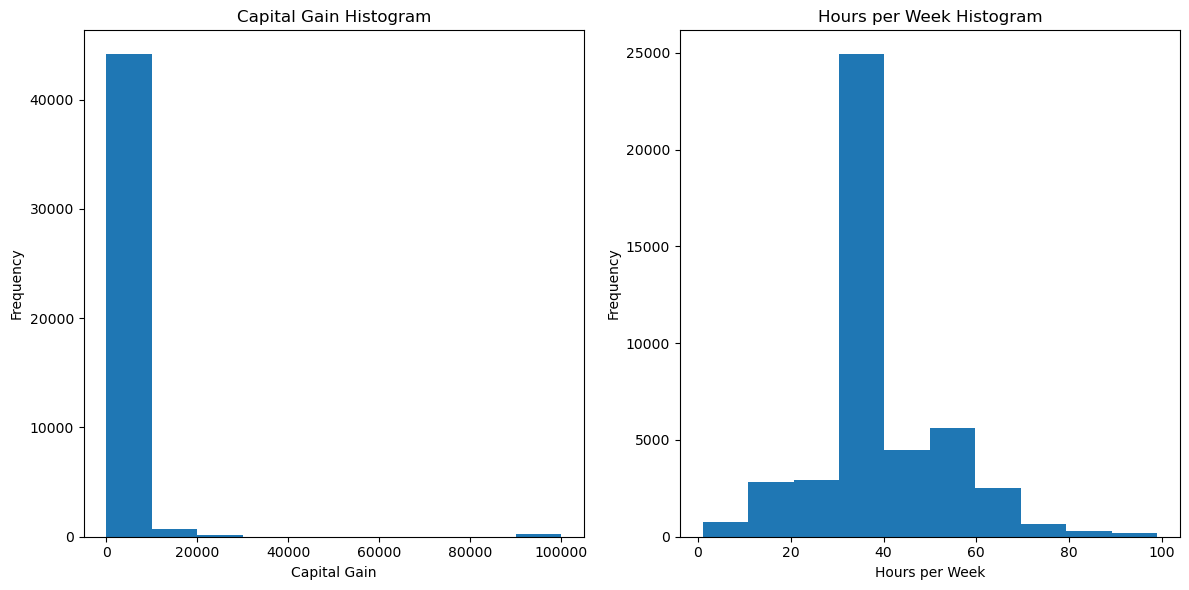

In [72]:
data_description = data.describe()
print("a. Median age:", data_description.loc['50%', 'age'])
print("b. 75th percentile of education-num:", data_description.loc['75%', 'education-num'])
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data['capital-gain'].plot(kind='hist', title='Capital Gain Histogram')
plt.xlabel('Capital Gain')

plt.subplot(1, 2, 2)
data['hours-per-week'].plot(kind='hist', title='Hours per Week Histogram')
plt.xlabel('Hours per Week')

plt.tight_layout()
plt.show()

In [73]:
#c. לפי הגרף אפשר לראות שאין התפלגות נורמלית כאן
#d. לפי הגרף אפשר לראות שאין כאן התפלגות נורמלית

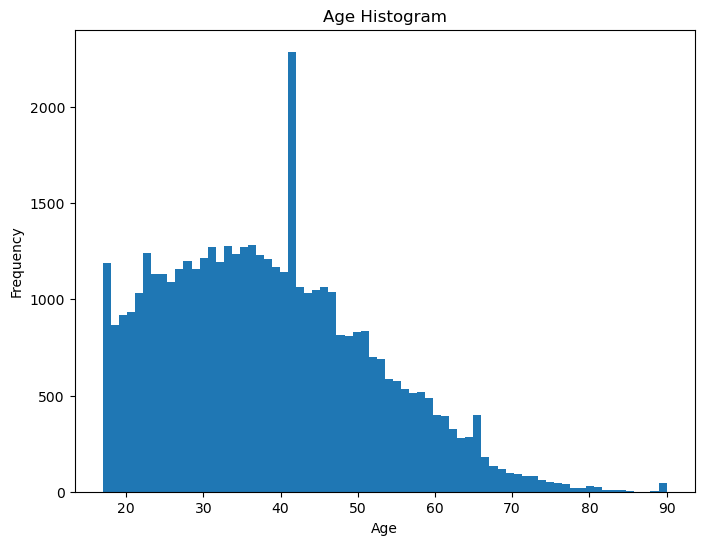

In [74]:
plt.figure(figsize=(8, 6))
data['age'].plot(kind='hist', bins=70, title='Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [75]:
above_50k_count = (data['income'] == '>50K').sum()

# Calculate the percentage of people with income above 50 thousand dollars
total_records = data.shape[0]
percentage_above_50k = (above_50k_count / total_records) * 100

print(f"Percentage of people earning above $50K: {percentage_above_50k:.2f}%")

Percentage of people earning above $50K: 24.78%


In [76]:
divorced_count = data[data['marital-status'].str.contains('Divorced')].shape[0]

print("Number of divorced people:", divorced_count)

Number of divorced people: 6297


In [77]:
import seaborn as sns
from scipy.stats import percentileofscore

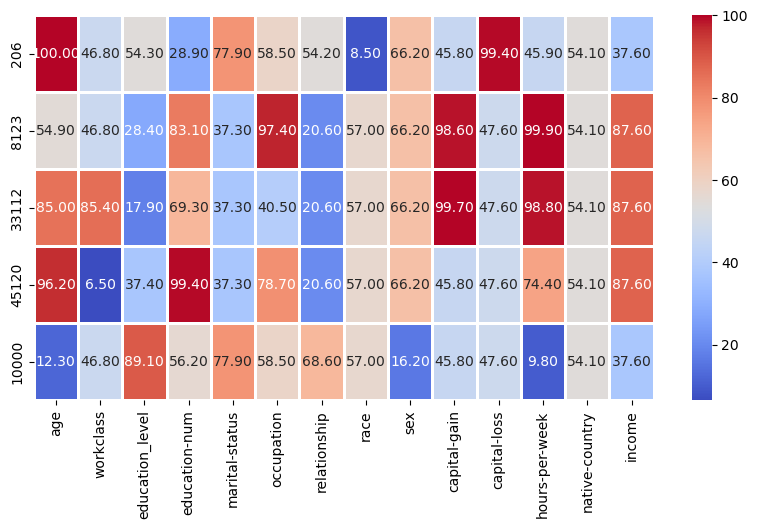

In [78]:
indices = [206, 8123, 33112, 45120, 10000]
percentiles = data.rank(pct=True) * 100
percentiles = percentiles.round(1)
percentiles = percentiles.iloc[indices]
plt.figure(figsize=(10, 5))
sns.heatmap(percentiles, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

15)
א. שורות 8123 ו33112 דומים באופן זהה בשדות של מצב משפחתי,מצב יחסים,גזע,מין,הפסד הון,מדינת מוצא והכנסה. ודמה מאוד בשדות של רווח הון, שעות עבודה בשבוע. 


ב. לשורות 206 ו45120 הם דומים באופן זהה בשדות מין, רווח הון ומדינת מוצא. כמו כן הם דומים מאוד באחוזונים בשדה של הגיל. 

In [79]:
income_raw = data['income']
features_raw = data.drop('income', axis=1)

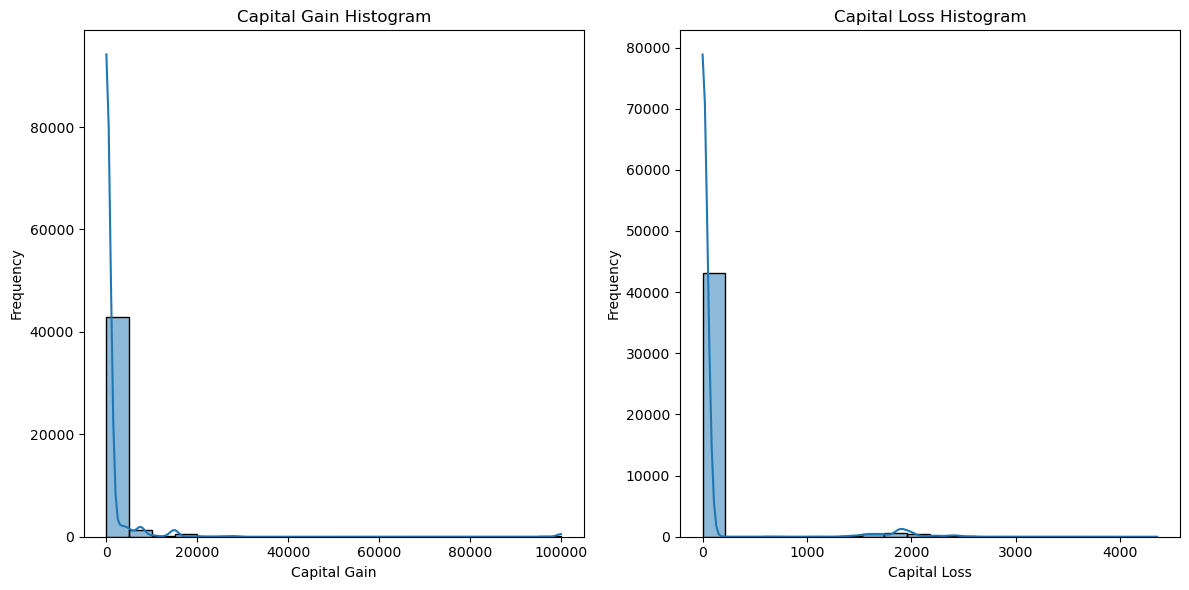

In [80]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['capital-gain'], bins=20, kde=True)
plt.title('Capital Gain Histogram')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['capital-loss'], bins=20, kde=True)
plt.title('Capital Loss Histogram')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

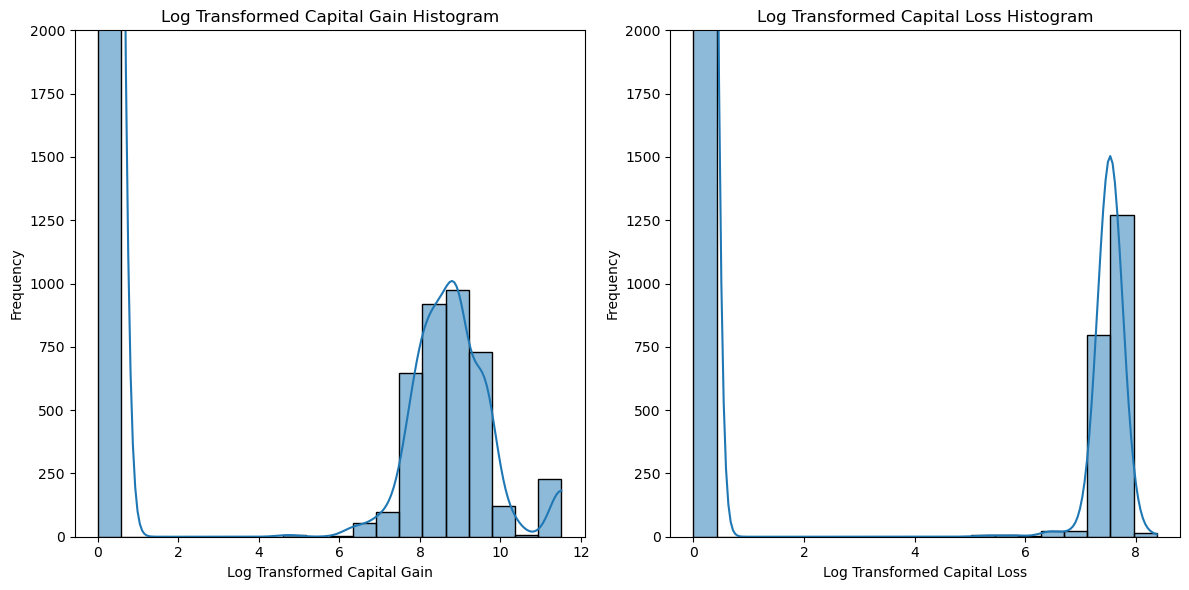

In [81]:
skewed = ['capital-gain', 'capital-loss']

features_log_transformed = pd.DataFrame(features_raw)

features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(features_log_transformed['capital-gain'], bins=20, kde=True)
plt.title('Log Transformed Capital Gain Histogram')
plt.xlabel('Log Transformed Capital Gain')
plt.ylabel('Frequency')
plt.ylim(ymax=2000)

plt.subplot(1, 2, 2)
sns.histplot(features_log_transformed['capital-loss'], bins=20, kde=True)
plt.title('Log Transformed Capital Loss Histogram')
plt.xlabel('Log Transformed Capital Loss')
plt.ylabel('Frequency')
plt.ylim(ymax=2000)

plt.tight_layout()
plt.show()

In [82]:
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

scaler = MinMaxScaler()

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)

numeric = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform[numeric] = scaler.fit_transform(features_log_transformed[numeric])

display(features_log_minmax_transform.head(7))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica


In [83]:
features_final = pd.get_dummies(features_log_minmax_transform)
display(features_final.head())

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
num_columns = features_final.shape[1]
print("Number of columns after one-hot encoding:", num_columns)

Number of columns after one-hot encoding: 103


In [85]:
column_names = features_final.columns.tolist()
print("Column names after one-hot encoding:", column_names)

Column names after one-hot encoding: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-cle

In [86]:
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size=0.2, random_state=42)

In [88]:
num_rows_train = X_train.shape[0]
num_rows_test = X_test.shape[0]
total_rows_original = features_final.shape[0]

print("Number of rows in training set:", num_rows_train)
print("Number of rows in test set:", num_rows_test)
print("Total number of rows in original table:", total_rows_original)

print("Sum of rows in training and test sets:", num_rows_train + num_rows_test)
print("Is sum equal to total rows?", num_rows_train + num_rows_test == total_rows_original)

Number of rows in training set: 36177
Number of rows in test set: 9045
Total number of rows in original table: 45222
Sum of rows in training and test sets: 45222
Is sum equal to total rows? True


In [89]:
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier 

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}
    
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train_time'] = end - start
    
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    results['pred_time'] = end - start
    results['pred_time_train'] = end - start
    
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    return results

learner = DecisionTreeClassifier()
sample_size = 1000

results = train_predict(learner, sample_size, X_train, y_train, X_test, y_test)
print(results)

DecisionTreeClassifier trained on 1000 samples.
{'train_time': 0.01898980140686035, 'pred_time': 0.019985198974609375, 'pred_time_train': 0.019985198974609375, 'acc_train': 1.0, 'acc_test': 0.7986733001658375, 'f_train': 1.0, 'f_test': 0.604702300405954}


AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.


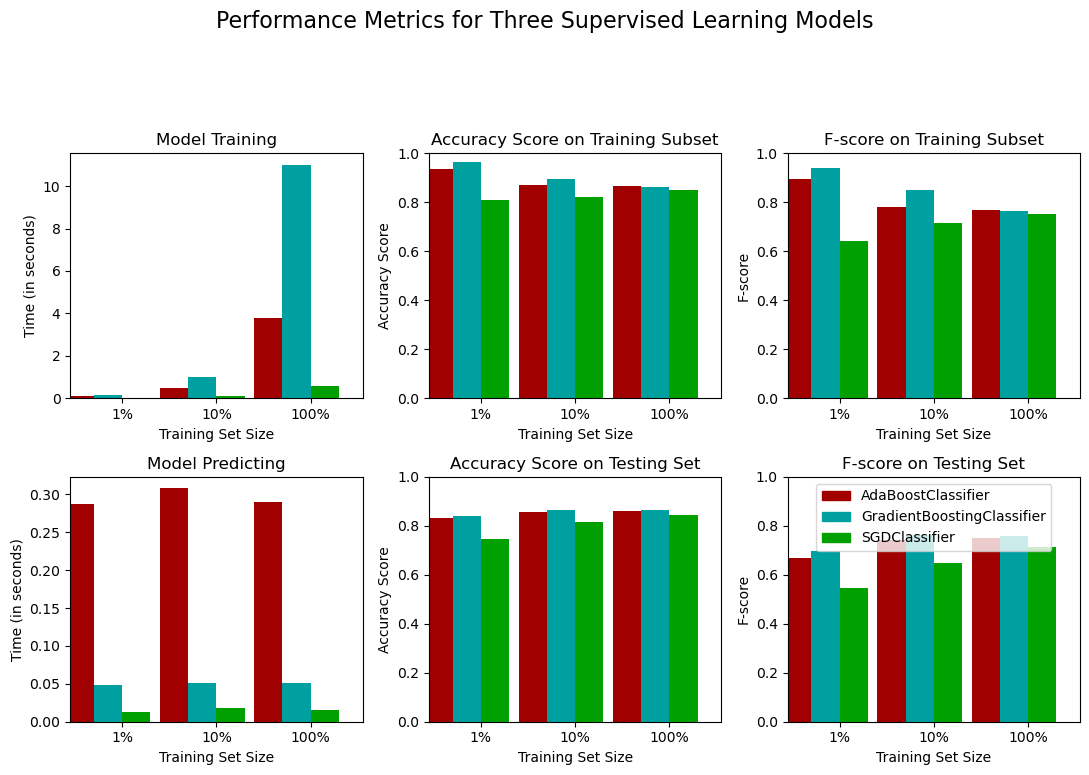

In [90]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from IPython.display import display

clf_A = AdaBoostClassifier(random_state=0)
clf_B = GradientBoostingClassifier(random_state=0)
clf_C = SGDClassifier(random_state=0)

samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

results = {}

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

vs.evaluate(results)


a. it's seems like the SGDClassifier algorithm is the fastest.

b. it's seems like the GradientBoostingClassifier is the one with the best overall performance.

In [91]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [92]:
data_for_clustering = features_final[:10000]
best_score = -1
best_components = 0

for n_components in range(2, 8):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    cluster_labels = gmm.fit_predict(data_for_clustering)
    silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_components = n_components
        
print("Best number of components:", best_components)

Best number of components: 3


In [93]:
from sklearn.cluster import KMeans
best_score = -1
best_clusters = 0

for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_for_clustering)
    silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_clusters = n_clusters
        
print("Best number of clusters:", best_clusters)

Best number of clusters: 3
